In [1]:
# Program to visualize the weather of 500+ cities across the world of varying distance from the equator
# To accomplish this, I'll be utilizing a simple Python library (https://pypi.python.org/pypi/citipy),
# the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.
# Object is to build a series of scatter plots to showcase the weather treads across the globe

In [2]:
# Import the dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
from pprint import pprint

# Import the OpenWeatherMap API key from config file 
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes 
lat_range = (-90, 90)
lng_range = (-180, 180)


In [3]:
## Generate Cities List ##
# List for holding lat_lngs and cities 
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)    

636

In [5]:
## Perform API Calls ##

# sample_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=santiago"
base_url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

# create an empty list to add the retrieved weather data for each city 
cities_weather = []

# print some statements to indicate the beiginning
print("-----------------------------")
print("Starting Data Retrieval\n")
print("-----------------------------")

# create a loop to go over each city in the cities list and get the weather data using the city name
for city in cities: 
    
    # assign the city name in the OpenWeatherMap url
    url = f"{base_url}{city}"
    
    # proceed with retrieval only if the statuscode response is 200
    if requests.get(url).status_code == 200:
        city_json = requests.get(url).json()
        print(f"Processing record {cities.index(city)+1} | {city}")
        cities_weather.append(city_json)
    else:
        print("Weather data not found for the city '" + city + "'. Skipping... ")
    
    # condition to wait for 2 min after retrieving 50 cities data as there is a cap set by OpenWeatherMap  
    if (cities.index(city)+1)%50 == 0:
        # adding sleeptime before next API call
        print("Sleeping for 2 mins")
        time.sleep(120)
        print("Let's continue")
        
# print the statements after the retrieval process is completed
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing record 1 | norman wells
Weather data not found for the city 'taolanaro'. Skipping... 
Processing record 3 | zonguldak
Processing record 4 | hobart
Processing record 5 | castro
Processing record 6 | jamestown
Processing record 7 | sunndalsora
Processing record 8 | bredasdorp
Processing record 9 | neratovice
Processing record 10 | kaitong
Processing record 11 | mar del plata
Weather data not found for the city 'samusu'. Skipping... 
Processing record 13 | beloha
Processing record 14 | hot springs
Processing record 15 | albany
Processing record 16 | tarauaca
Processing record 17 | codrington
Processing record 18 | port elizabeth
Processing record 19 | rikitea
Processing record 20 | cape town
Processing record 21 | itarema
Processing record 22 | elko
Processing record 23 | cabo san lucas
Processing record 24 | kapaa
Weather data not found for the city 'nizhneyansk'. Skipping... 
Processing record 26 | usinsk
Processing record 27 | alofi
Processing record 28 | ust-kuyga
Processin

Processing record 225 | lata
Processing record 226 | petatlan
Processing record 227 | shihezi
Processing record 228 | quatre cocos
Processing record 229 | dunedin
Processing record 230 | menongue
Processing record 231 | gambo
Processing record 232 | pombas
Processing record 233 | severo-kurilsk
Processing record 234 | tiksi
Processing record 235 | sabang
Processing record 236 | cueto
Processing record 237 | chokurdakh
Processing record 238 | lorengau
Processing record 239 | progreso
Processing record 240 | hengshui
Processing record 241 | qaanaaq
Processing record 242 | churapcha
Processing record 243 | loukhi
Processing record 244 | stribro
Processing record 245 | matara
Processing record 246 | gvardeysk
Weather data not found for the city 'tsihombe'. Skipping... 
Processing record 248 | petukhovo
Processing record 249 | dongsheng
Processing record 250 | sao filipe
Sleeping for 2 mins
Let's continue
Processing record 251 | vestmanna
Processing record 252 | airai
Processing record 253 

Let's continue
Processing record 451 | fairbanks
Processing record 452 | verkhnevilyuysk
Processing record 453 | san rafael
Processing record 454 | sao joao da barra
Processing record 455 | balikpapan
Weather data not found for the city 'azimur'. Skipping... 
Processing record 457 | karasjok
Processing record 458 | vilhena
Processing record 459 | surt
Processing record 460 | ryotsu
Processing record 461 | jumla
Processing record 462 | estelle
Processing record 463 | crowley
Processing record 464 | pervoavgustovskiy
Processing record 465 | gornopravdinsk
Weather data not found for the city 'ruatoria'. Skipping... 
Processing record 467 | oranjemund
Processing record 468 | hami
Processing record 469 | luganville
Processing record 470 | utinga
Weather data not found for the city 'atlantic city'. Skipping... 
Processing record 472 | maceio
Processing record 473 | fortuna
Processing record 474 | debno
Processing record 475 | smithers
Processing record 476 | baikunthpur
Processing record 477

In [7]:
# check the data of one of the list items 
cities_weather[0]

{'coord': {'lon': -126.83, 'lat': 65.28},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': -34.61,
  'pressure': 1023,
  'humidity': 65,
  'temp_min': -34.61,
  'temp_max': -34.61},
 'visibility': 24140,
 'wind': {'speed': 3.36, 'deg': 310},
 'clouds': {'all': 75},
 'dt': 1547175600,
 'sys': {'type': 1,
  'id': 951,
  'message': 0.0049,
  'country': 'CA',
  'sunrise': 1547230743,
  'sunset': 1547247130},
 'id': 6089245,
 'name': 'Norman Wells',
 'cod': 200}

In [9]:
## Convert Raw Data to DataFrame ##

# create an empty dataframe
cities_df = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", 
                                  "Max Temp", "Wind Speed"])

# go over each row in the retrieved weathers' list and add it to the dataframe in appropriate columns
for city_weather in cities_weather:
    # use the index of the list to go to the specific row in the dataframe 
    cities_df.loc[cities_weather.index(city_weather)] = [city_weather["name"],
                                                         city_weather["clouds"]["all"],
                                                         city_weather["sys"]["country"],
                                                         city_weather["dt"],
                                                         city_weather["main"]["humidity"],
                                                         city_weather["coord"]["lat"],
                                                         city_weather["coord"]["lon"],
                                                         city_weather["main"]["temp_max"],
                                                         city_weather["wind"]["speed"]]


# Export the city data into a .csv.
output_file = f"cities_weather_data.csv"
cities_df.to_csv(output_file, index=False)

# Display the DataFrame
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Norman Wells,75,CA,1547175600,65,65.28,-126.83,-34.61,3.36
1,Zonguldak,68,TR,1547180233,63,41.25,31.83,51.19,13.00
2,Hobart,20,AU,1547177400,42,-42.88,147.33,80.60,12.75
3,Castro,32,CL,1547179200,93,-42.48,-73.76,42.80,2.24
4,Jamestown,0,AU,1547180234,63,-33.21,138.60,84.13,7.85


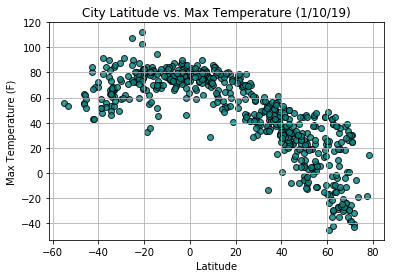

In [21]:
## Plotting the Data ##

# Latitude vs. Temperature Plot 
fig, ax = plt.subplots()

# create a scatter plot
ax.scatter(cities_df["Lat"], cities_df["Max Temp"], marker='o', color='teal', edgecolor='k', alpha=0.8)

# adding the titles, labels and grid
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (1/10/19)")
ax.grid()

# Save the plotted figures as .pngs.
plt.savefig("charts/Latitude vs. Temperature Plot.png")



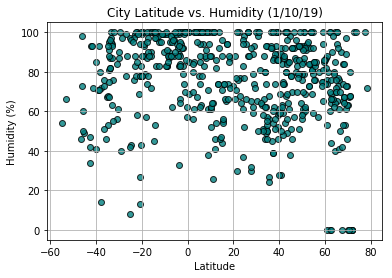

In [22]:
# Latitude vs. Humidity Plot
fig, ax = plt.subplots()

# create a scatter plot
ax.scatter(cities_df["Lat"], cities_df["Humidity"], marker='o', color='teal', edgecolor='k', alpha=0.8)

# adding the titles, labels and grid
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs. Humidity (1/10/19)")
ax.grid()

# Save the plotted figures as .pngs.
plt.savefig("charts/City Latitude vs. Humidity.png")


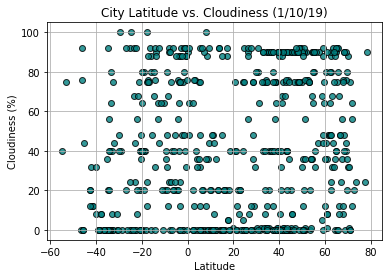

In [23]:
# Latitude vs. Cloudiness Plot
fig, ax = plt.subplots()

# create a scatter plot
ax.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker='o', color='teal', edgecolor='k', alpha=0.8)

# adding the titles, labels and grid
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs. Cloudiness (1/10/19)")
ax.grid()

# Save the plotted figures as .pngs.
plt.savefig("charts/City Latitude vs. Cloudiness.png")


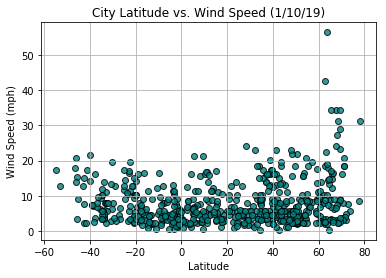

In [24]:
# Latitude vs. Wind Speed Plot
fig, ax = plt.subplots()

# create a scatter plot
ax.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker='o', color='teal', edgecolor='k', alpha=0.8)

# adding the titles, labels and grid
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (1/10/19)")
ax.grid()

# Save the plotted figures as .pngs.
plt.savefig("charts/City Latitude vs. Wind Speed.png")


In [25]:
# Summary of observations for the cities in consideration on 1/10/19
# 1. Cities in the Northern hemisphere tend to have much lower temperatures at this time of the year compared to the 
#    cities in the Southern Hemisphere at the same distance  due to the tilt in the earth's axis. 
# 2. The relation between humidity and latitude is not causal as the humidity 
#    doesn't seem to be too affected by the latitude. 
# 3. Same is the case with Cloudiness as it doesn't seem to be too affected by the latitude. 
# 4. The Wind Speed tend to be much higher as we move north of the equator especially all cities after Lat > 60 deg
